# Reinforcement Learning

&copy; 李浩东 3190104890@zju.edu.cn

- Markov Decision Process (MDP)
- Value Iteration
- Q-Learning
- Deep Q-Learning


## Markov Decision Process (MDP)

![rl-loop.png](./images/8/rl-loop.png)


### Return and Discount Factor

![mdp.png](./images/8/mdp.png)

- The different components above together form a Markov decision process (MDP)

$$\text{MDP}: (\mathcal{S}, \mathcal{A}, T, r).$$

- Let's now consider the situation when the robot starts at a particular state $s_0 \in \mathcal{S}$ and continues taking actions to result in a trajectory

$$\tau = (s_0, a_0, r_0, s_1, a_1, r_1, s_2, a_2, r_2, \ldots).$$

- At each time step $t$ the robot is at a state $s_t$ and takes an action $a_t$ which results in a reward $r_t = r(s_t, a_t)$. The *return* of a trajectory is the total reward obtained by the robot along such a trajectory

$$R(\tau) = r_0 + r_1 + r_2 + \cdots.$$

- **The goal in reinforcement learning is to find a trajectory that has the largest *return*.**


![mdp.png](./images/8/mdp.png)


- Think of the situation when the robot continues to travel in the gridworld without ever reaching the goal location. The sequence of states and actions in a trajectory can be infinitely long in this case and the *return* of any such infinitely long trajectory will be infinite. In order to keep the reinforcement learning formulation meaningful even for such trajectories, we introduce the notion of a discount factor $\gamma < 1$. We write the discounted *return* as

$$R(\tau) = r_0 + \gamma r_1 + \gamma^2 r_2 + \cdots = \sum_{t=0}^\infty \gamma^t r_t.$$

- Note that if $\gamma$ is very small, the rewards earned by the robot in the far future, say $t = 1000$, are heavily discounted by the factor $\gamma^{1000}$. This **encourages the robot to select short trajectories that achieve its goal**, namely that of going to the green house in the gridwold example. For large values of the discount factor, say $\gamma = 0.99$, **the robot is encouraged to *explore*** and then find the best trajectory to go to the goal location.

## Value Iteration

![mdp.png](./images/8/mdp.png)

- Imagine now that the robot starts at a state $s_0$ and at each time instant, it first samples an action from the policy $a_t \sim \pi(s_t)$ and takes this action to result in the next state $s_{t+1}$. The trajectory $\tau = (s_0, a_0, r_0, s_1, a_1, r_1, \ldots)$, can be different depending upon which particular action $a_t$ is sampled at intermediate instants. We define the average *return* $R(\tau) = \sum_{t=0}^\infty \gamma^t r(s_t, a_t)$ of all such trajectories

$$V^\pi(s_0) = E_{a_t \sim \pi(s_t)} \Big[ R(\tau) \Big] = E_{a_t \sim \pi(s_t)} \Big[ \sum_{t=0}^\infty \gamma^t r(s_t, a_t) \Big],$$

- where $s_{t+1} \sim P(s_{t+1} \mid s_t, a_t)$ is the next state of the robot and $r(s_t, a_t)$ is the instantaneous reward obtained by taking action $a_t$ in state $s_t$ at time $t$. This is called the "value function" for the policy $\pi$. In simple words, the value of a state $s_0$ for a policy $\pi$, denoted by $V^\pi(s_0)$, is the expected $\gamma$-discounted *return* obtained by the robot if it begins at state $s_0$ and takes actions from the policy $\pi$ at each time instant.



- We next break down the trajectory into two stages 
    - (i) the first stage which corresponds to $s_0 \to s_1$ upon taking the action $a_0$, and 
    - (ii) a second stage which is the trajectory $\tau' = (s_1, a_1, r_1, \ldots)$ thereafter. 
- The key idea behind all algorithms in reinforcement learning is that **the value of state $s_0$ can be written as the average reward obtained in the first stage and the value function averaged over all possible next states $s_1$**. This is quite intuitive and arises from our Markov assumption: the average return from the current state is the sum of the average return from the next state and the average reward of going to the next state. 
- Mathematically, we write the two stages as

$$V^\pi(s_0) = r(s_0, a_0) + \gamma\ E_{a_0 \sim \pi(s_0)} \Big[ E_{s_1 \sim P(s_1 \mid s_0, a_0)} \Big[ V^\pi(s_1) \Big] \Big].$$

- Then using the transition probabilities in the Markov decision process (MDP), we can write

$$V^\pi(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^\pi(s') \Big];\ \text{for all } s \in \mathcal{S}.$$

- An important thing to notice here is that the above identity holds for all states $s \in \mathcal{S}$ because we can think of any trajectory that begins at that state and break down the trajectory into two stages.

### Action-Value Function

- In implementations, it is often useful to maintain a quantity called the "action value" function which is a closely related quantity to the value function. This is defined to be the average *return* of a trajectory that begins at $s_0$ but when the action of the first stage is fixed to be $a_0$

$$Q^\pi(s_0, a_0) = r(s_0, a_0) + E_{a_t \sim \pi(s_t)} \Big[ \sum_{t=1}^\infty \gamma^t r(s_t, a_t) \Big],$$

- note that the summation inside the expectation is from $t=1,\ldots, \infty$ because the reward of the first stage is fixed in this case. We can again break down the trajectory into two parts and write

$$Q^\pi(s, a) = r(s, a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a) \sum_{a' \in \mathcal{A}} \pi(a' \mid s')\ Q^\pi(s', a');\ \text{ for all } s \in \mathcal{S}, a \in \mathcal{A}.$$


### Optimal Stochastic Policy

- Both the value function and the action-value function depend upon the policy that the robot chooses. We will next think of the "optimal policy" that achieves the maximal average *return*

$$\pi^* = \underset{\pi}{\mathrm{argmax}} V^\pi(s_0).$$

- Of all possible stochastic policies that the robot could have taken, the optimal policy $\pi^*$  achieves the largest average discounted *return* for trajectories starting from state $s_0$. Let us denote the value function and the action-value function of the optimal policy as $V^* \equiv V^{\pi^*}$ and $Q^* \equiv Q^{\pi^*}$.

- Let us observe that for a deterministic policy where there is only one action that is possible under the policy at any given state. This gives us

$$\pi^*(s) = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \Big[ r(s, a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a)\ V^*(s') \Big].$$

- A good mnemonic to remember this is that the optimal action at state $s$ (for a deterministic policy) is the one that **maximizes the sum of reward $r(s, a)$ from the first stage and the average *return* of the trajectories starting from the next sate $s'$, averaged over all possible next states $s'$ from the second stage**.

### Principle of Dynamic Programming

- Our developement in the previous section in :eqref:`eq_dynamic_programming` or :eqref:`eq_dynamic_programming_q` can be turned into an algorithm to compute the optimal value function $V^*$ or the action-value function $Q^*$, respectively. Observe that

$$ V^*(s) = \sum_{a \in \mathcal{A}} \pi^*(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^*(s') \Big];\ \text{for all } s \in \mathcal{S}.$$

- For a deterministic optimal policy $\pi^*$, since there is only one action that can be taken at state $s$, we can also write 

$$V^*(s) = \mathrm{argmax}_{a \in \mathcal{A}} \Big\{ r(s,a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^*(s') \Big\}$$

- for all states $s \in \mathcal{S}$. This identity is called the "principle of dynamic programming". It was formulated by Richard Bellman in 1950s and we can remember it as "the remainder of an optimal trajectory is also optimal".

### Value Iteration

- We can turn the principle of dynamic programming into an algorithm for finding the optimal value function called value iteration. The key idea behind value iteration is to think of this identity as a set of constraints that tie together $V^*(s)$ at different states $s \in \mathcal{S}$. We initialize the value function to some arbitrary values $V_0(s)$ for all states $s \in \mathcal{S}$. At the $k^{\text{th}}$ iteration, the Value Iteration algorithm updates the value function as

$$V_{k+1}(s) = \max_{a \in \mathcal{A}} \Big\{ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V_k(s') \Big\};\ \text{for all } s \in \mathcal{S}.$$

- It turns out that as $k \to \infty$ the value function estimated by the Value Iteration algorithm converges to the optimal value function irrespective of the initialization $V_0$,

$$V^*(s) = \lim_{k \to \infty} V_k(s);\ \text{for all states } s \in \mathcal{S}.$$

- The same Value Iteration algorithm can be equivalently written using the action-value function as

$$Q_{k+1}(s, a) = r(s, a) + \gamma \max_{a' \in \mathcal{A}} \sum_{s' \in \mathcal{S}} P(s' \mid s, a) Q_k (s', a');\ \text{ for all } s \in \mathcal{S}, a \in \mathcal{A}.$$

- In this case we initialize $Q_0(s, a)$ to some arbitrary values for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. Again we have $Q^*(s, a) = \lim_{k \to \infty} Q_k(s, a)$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$.

### Policy Evaluation

- Value Iteration enables us to compute the optimal value function, i.e., $V^{\pi^*}$ of the optimal deterministic policy $\pi^*$. We can also use similar iterative updates to compute the value function associated with any other, potentially stochastic, policy $\pi$. We again initialize $V^\pi_0(s)$ to some arbitrary values for all states $s \in \mathcal{S}$ and at the $k^{\text{th}}$ iteration, perform the updates

$$    V^\pi_{k+1}(s) = \sum_{a \in \mathcal{A}} \pi(a \mid s) \Big[ r(s,  a) + \gamma\  \sum_{s' \in \mathcal{S}} P(s' \mid s, a) V^\pi_k(s') \Big];\ \text{for all } s \in \mathcal{S}.$$

- This algorithm is known as policy evaluation and is useful to compute the value function given the policy. Again, it turns out that as $k \to \infty$ these updates converge to the correct value function irrespective of the initialization $V_0$,

$$V^\pi(s) = \lim_{k \to \infty} V^\pi_k(s);\ \text{for all states } s \in \mathcal{S}.$$

- The algorithm for computing the action-value function $Q^\pi(s, a)$ of a policy $\pi$ is analogous.

In [15]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
import gym

seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 10  # Number of iterations
random.seed(seed)  # Set the random seed to ensure results can be reproduced
np.random.seed(seed)

def frozen_lake(seed):
    """Defined in :numref:`sec_utils`"""
    # See https://www.gymlibrary.dev/environments/toy_text/frozen_lake/ to learn more about this env
    # How to process env.P.items is adpated from https://sites.google.com/view/deep-rl-bootcamp/labs

    env = gym.make('FrozenLake-v1', is_slippery=False)
    env.seed(seed)
    env.action_space.np_random.seed(seed)
    env.action_space.seed(seed)
    env_info = {}
    env_info['desc'] = env.desc  # 2D array specifying what each grid item means
    env_info['num_states'] = env.nS  # Number of observations/states or obs/state dim
    env_info['num_actions'] = env.nA  # Number of actions or action dim
    # Define indices for (transition probability, nextstate, reward, done) tuple
    env_info['trans_prob_idx'] = 0  # Index of transition probability entry
    env_info['nextstate_idx'] = 1  # Index of next state entry
    env_info['reward_idx'] = 2  # Index of reward entry
    env_info['done_idx'] = 3  # Index of done entry
    env_info['mdp'] = {}
    env_info['env'] = env

    for (s, others) in env.P.items():
        # others(s) = {a0: [ (p(s'|s,a0), s', reward, done),...], a1:[...], ...}

        for (a, pxrds) in others.items():
            # pxrds is [(p1,next1,r1,d1),(p2,next2,r2,d2),..].
            # e.g. [(0.3, 0, 0, False), (0.3, 0, 0, False), (0.3, 4, 1, False)]
            env_info['mdp'][(s,a)] = pxrds

    return env_info

In [16]:
def show_value_function_progress(env_desc, V, pi):
    """Defined in :numref:`sec_utils`"""
    # This function visualizes how value and policy changes over time.
    # V: [num_iters, num_states]
    # pi: [num_iters, num_states]
    # How to visualize value function is adapted (but changed) from: https://sites.google.com/view/deep-rl-bootcamp/labs

    num_iters = V.shape[0]
    fig, ax  = plt.subplots(figsize=(15, 15))

    for k in range(V.shape[0]):
        plt.subplot(4, 4, k + 1)
        plt.imshow(V[k].reshape(4,4), cmap="bone")
        ax = plt.gca()
        ax.set_xticks(np.arange(0, 5)-.5, minor=True)
        ax.set_yticks(np.arange(0, 5)-.5, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax.tick_params(which="minor", bottom=False, left=False)
        ax.set_xticks([])
        ax.set_yticks([])

        # LEFT action: 0, DOWN action: 1
        # RIGHT action: 2, UP action: 3
        action2dxdy = {0:(-.25, 0),1: (0, .25),
                       2:(0.25, 0),3: (-.25, 0)}

        for y in range(4):
            for x in range(4):
                action = pi[k].reshape(4,4)[y, x]
                dx, dy = action2dxdy[action]

                if env_desc[y,x].decode() == 'H':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="y",
                         size=20, fontweight='bold')

                elif env_desc[y,x].decode() == 'G':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="w",
                         size=20, fontweight='bold')

                else:
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="g",
                         size=15, fontweight='bold')

                # No arrow for cells with G and H labels
                if env_desc[y,x].decode() != 'G' and env_desc[y,x].decode() != 'H':
                    ax.arrow(x, y, dx, dy, color='r', head_width=0.2, head_length=0.15)

        ax.set_title("Step = "  + str(k + 1), fontsize=20)

    fig.tight_layout()
    plt.show()

In [17]:
# Now set up the environment
env_info = frozen_lake(seed)

def value_iteration(env_info, gamma, num_iters):
    env_desc = env_info['desc']  # 2D array shows what each item means
    prob_idx = env_info['trans_prob_idx']
    nextstate_idx = env_info['nextstate_idx']
    reward_idx = env_info['reward_idx']
    num_states = env_info['num_states']
    num_actions = env_info['num_actions']
    mdp = env_info['mdp']

    V  = np.zeros((num_iters + 1, num_states))
    Q  = np.zeros((num_iters + 1, num_states, num_actions))
    pi = np.zeros((num_iters + 1, num_states))

    for k in range(1, num_iters + 1):
        for s in range(num_states):
            for a in range(num_actions):
                # Calculate \sum_{s'} p(s'\mid s,a) [r + \gamma v_k(s')]
                for pxrds in mdp[(s,a)]:
                    # mdp(s,a): [(p1,next1,r1,d1),(p2,next2,r2,d2),..]
                    pr = pxrds[prob_idx]  # p(s'\mid s,a)
                    nextstate = pxrds[nextstate_idx]  # Next state
                    reward = pxrds[reward_idx]  # Reward
                    Q[k,s,a] += pr * (reward + gamma * V[k - 1, nextstate])
            # Record max value and max action
            V[k,s] = np.max(Q[k,s,:])
            pi[k,s] = np.argmax(Q[k,s,:])
    show_value_function_progress(env_desc, V[:-1], pi[:-1])

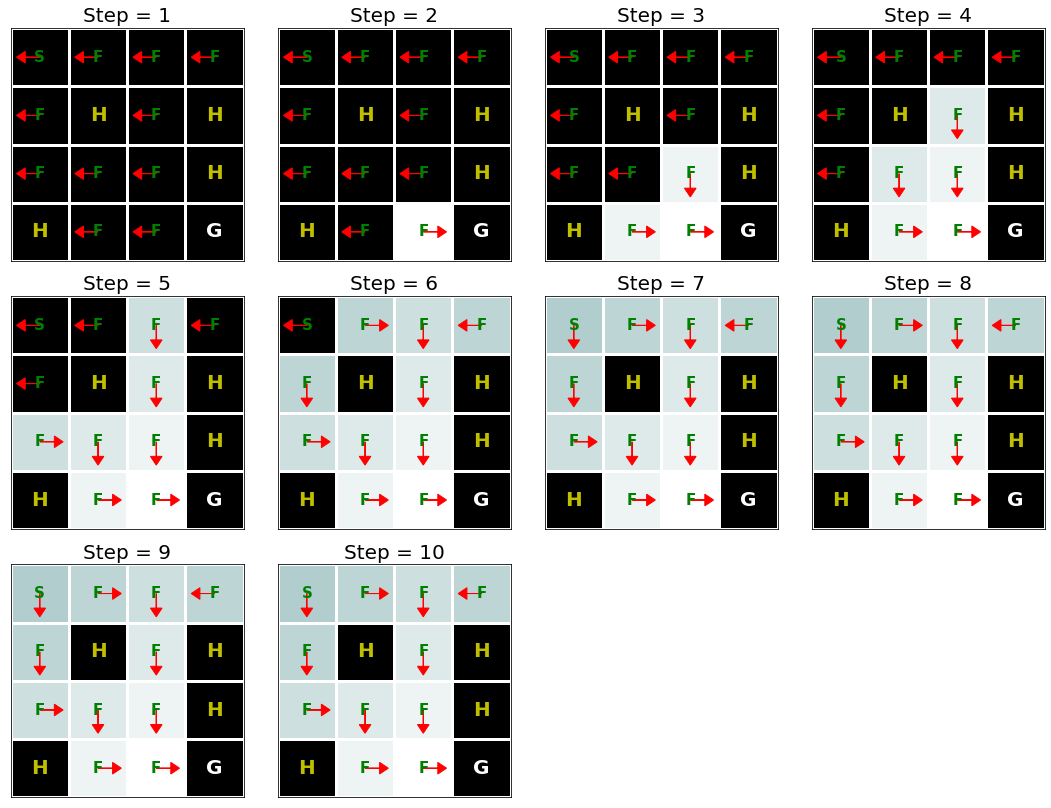

In [18]:
value_iteration(env_info=env_info, gamma=gamma, num_iters=num_iters)

## Q-Learning

### The Q-Learning Algorithm

- Recall that value iteration for the action-value function in :ref:`sec_valueiter` corresponds to the update

$$Q_{k+1}(s, a) = r(s, a) + \gamma \sum_{s' \in \mathcal{S}} P(s' \mid s, a) \max_{a' \in \mathcal{A}} Q_k (s', a'); \ \text{for all } s \in \mathcal{S} \text{ and } a \in \mathcal{A}.$$

- As we discussed, implementing this algorithm requires knowing the MDP, specifically the transition function $P(s' \mid s, a)$. The key idea behind Q-Learning is to **replace the summation over all $s' \in \mathcal{S}$ in the above expression by a summation over the states visited by the robot**. This allows us to subvert the need to know the transition function.


### An Optimization Problem Underlying Q-Learning

- Let us imagine that the robot uses a policy $\pi_e(a \mid s)$ to take actions. Just like the previous chapter, it collects a dataset of $n$ trajectories of $T$ timesteps each $\{ (s_t^i, a_t^i)_{t=0,\ldots,T-1}\}_{i=1,\ldots, n}$. Recall that value iteration is really a set of constraints that ties together the action-value $Q^*(s, a)$ of different states and actions to each other. We can implement an approximate version of value iteration using the data that the robot has collected using $\pi_e$ as

$$\hat{Q} = \min_Q \underbrace{\frac{1}{nT} \sum_{i=1}^n \sum_{t=0}^{T-1} (Q(s_t^i, a_t^i) - r(s_t^i, a_t^i) - \gamma \max_{a'} Q(s_{t+1}^i, a'))^2}_{\stackrel{\mathrm{def}}{=} \ell(Q)}.$$

- The variables of our optimization problem are $Q(s, a)$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. We can minimize the objective using gradient descent. For every pair $(s_t^i, a_t^i)$ in our dataset, we can write

$$\begin{aligned}Q(s_t^i, a_t^i) &\leftarrow Q(s_t^i, a_t^i) - \alpha \nabla_{Q(s_t^i,a_t^i)} \ell(Q) \\&=(1 - \alpha) Q(s_t^i,a_t^i) - \alpha \Big( r(s_t^i, a_t^i) + \gamma \max_{a'} Q(s_{t+1}^i, a') \Big),\end{aligned}$$

- where $\alpha$ is the learning rate. 

- Typically in real problems, when the robot reaches the goal location, the trajectories end. The value of such a terminal state is zero because the robot does not take any further actions beyond this state. We should modify our update to handle such states as

$$Q(s_t^i, a_t^i) =(1 - \alpha) Q(s_t^i,a_t^i) - \alpha \Big( r(s_t^i, a_t^i) + \gamma (1 - \mathbb{1}_{s_{t+1}^i \text{ is terminal}} )\max_{a'} Q(s_{t+1}^i, a') \Big).$$

- where $\mathbb{1}_{s_{t+1}^i \text{ is terminal}}$ is an indicator variable that is one if $s_{t+1}^i$ is a terminal state and zero otherwise. 
- The value of state-action tuples $(s, a)$ that are not a part of the dataset is set to $-\infty$. This algorithm is known as Q-Learning.

- Given the solution of these updates $\hat{Q}$, which is an approximation of the optimal value function $Q^*$, we can obtain the optimal deterministic policy corresponding to this value function easily using

$$\hat{\pi}(s) = \mathrm{argmax}_{a} \hat{Q}(s, a).$$

- There can be situations when there are multiple deterministic policies that correspond to the same optimal value function; such ties can be broken arbitrarily because they have the same value function.

### Exploration in Q-Learning

- The policy used by the robot to collect data $\pi_e$ is critical to ensure that Q-Learning works well. Afterall, we have replaced the expectation over $s'$ using the transition function $P(s' \mid s, a)$ using the data collected by the robot. 
- If the policy $\pi_e$ does **not reach diverse parts of the state-action space**, then it is easy to imagine our estimate $\hat{Q}$ will be a poor approximation of the optimal $Q^*$. It is also important to note that in such a situation, the estimate of $Q^*$ at *all states* $s \in \mathcal{S}$ will be bad, not just the ones visited by $\pi_e$. This is because the Q-Learning objective (or value iteration) is **a constraint that ties together the value of all state-action pairs**. It is therefore critical to pick the correct policy $\pi_e$ to collect data.

- We can mitigate this concern by picking a completely random policy $\pi_e$ that samples actions uniformly randomly from $\mathcal{A}$. Such a policy would visit all states, but it will take a large number of trajectories before it does so.

- We thus arrive at the second key idea in Q-Learning, namely exploration. Typical implementations of Q-Learning tie together the current estimate of $Q$ and the policy $\pi_e$ to set

$$\pi_e(a \mid s) = \begin{cases}\mathrm{argmax}_{a'} \hat{Q}(s, a') & \text{with prob. } 1-\epsilon \\ \text{uniform}(\mathcal{A}) & \text{with prob. } \epsilon,\end{cases}$$

- where $\epsilon$ is called the "exploration parameter" and is chosen by the user. 

- The policy $\pi_e$ is called an exploration policy. This particular $\pi_e$ is called an $\epsilon$-greedy exploration policy because it chooses the optimal action (under the current estimate $\hat{Q}$) with probability $1-\epsilon$ but explores randomly with the remainder probability $\epsilon$. We can also use the so-called softmax exploration policy

$$\pi_e(a \mid s) = \frac{e^{\hat{Q}(s, a)/T}}{\sum_{a'} e^{\hat{Q}(s, a')/T}};$$

- where the hyper-parameter $T$ is called temperature. A large value of $\epsilon$ in $\epsilon$-greedy policy functions similarly to a large value of temperature $T$ for the softmax policy.

- It is important to note that when we pick an exploration that depends upon the current estimate of the action-value function $\hat{Q}$, we need to resolve the optimization problem periodically. Typical implementations of Q-Learning make one mini-batch update using a few state-action pairs in the collected dataset (typically the ones collected from the previous timestep of the robot) after taking every action using $\pi_e$.

### The "Self-correcting" Property of Q-Learning

- Consider a state $s$: if a particular action $a$ has a large value under the current estimate $\hat{Q}(s,a)$, then both the $\epsilon$-greedy and the softmax exploration policies have a larger probability of picking this action. 
- If this action actually is *not* the ideal action, then the future states that arise from this action will have poor rewards. The next update of the Q-Learning objective will therefore reduce the value $\hat{Q}(s,a)$, which will reduce the probability of picking this action the next time the robot visits state $s$. Bad actions, e.g., ones whose value is overestimated in $\hat{Q}(s,a)$, are explored by the robot but their value is correct in the next update of the Q-Learning objective. Good actions, e.g., whose value $\hat{Q}(s, a)$ is large, are explored more often by the robot and thereby reinforced. 

- This ability to **not only collect new data but also collect the right kind of data** is the central feature of reinforcement learning algorithms, and this is what distinguishes them from supervised learning. Q-Learning, using deep neural networks (which we will see in the DQN chapeter later), is responsible for the resurgence of reinforcement learning.

In [20]:
seed = 0  # Random number generator seed
gamma = 0.95  # Discount factor
num_iters = 256  # Number of iterations
alpha   = 0.9  # Learing rate
epsilon = 0.9  # Epsilon in epsilion gready algorithm
random.seed(seed)  # Set the random seed
np.random.seed(seed)

# Now set up the environment
env_info = frozen_lake(seed)

In [23]:
def show_Q_function_progress(env_desc, V_all, pi_all):
    """Defined in :numref:`sec_utils`"""
    # This function visualizes how value and policy changes over time.
    # V: [num_iters, num_states]
    # pi: [num_iters, num_states]

    # We want to only shows few values
    num_iters_all = V_all.shape[0]
    num_iters = num_iters_all // 10

    vis_indx = np.arange(0, num_iters_all, num_iters).tolist()
    vis_indx.append(num_iters_all - 1)
    V = np.zeros((len(vis_indx), V_all.shape[1]))
    pi = np.zeros((len(vis_indx), V_all.shape[1]))

    for c, i in enumerate(vis_indx):
        V[c]  = V_all[i]
        pi[c] = pi_all[i]

    num_iters = V.shape[0]
    fig, ax = plt.subplots(figsize=(15, 15))

    for k in range(V.shape[0]):
        plt.subplot(4, 4, k + 1)
        plt.imshow(V[k].reshape(4,4), cmap="bone")
        ax = plt.gca()
        ax.set_xticks(np.arange(0, 5)-.5, minor=True)
        ax.set_yticks(np.arange(0, 5)-.5, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax.tick_params(which="minor", bottom=False, left=False)
        ax.set_xticks([])
        ax.set_yticks([])

        # LEFT action: 0, DOWN action: 1
        # RIGHT action: 2, UP action: 3
        action2dxdy = {0:(-.25, 0),1:(0, .25),
                       2:(0.25, 0),3:(-.25, 0)}

        for y in range(4):
            for x in range(4):
                action = pi[k].reshape(4,4)[y, x]
                dx, dy = action2dxdy[action]

                if env_desc[y,x].decode() == 'H':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="y",
                         size=20, fontweight='bold')

                elif env_desc[y,x].decode() == 'G':
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="w",
                         size=20, fontweight='bold')

                else:
                    ax.text(x, y, str(env_desc[y,x].decode()),
                       ha="center", va="center", color="g",
                         size=15, fontweight='bold')

                # No arrow for cells with G and H labels
                if env_desc[y,x].decode() != 'G' and env_desc[y,x].decode() != 'H':
                    ax.arrow(x, y, dx, dy, color='r', head_width=0.2, head_length=0.15)

        ax.set_title("Step = "  + str(vis_indx[k] + 1), fontsize=20)

    fig.tight_layout()
    plt.show()

In [25]:
def e_greedy(env, Q, s, epsilon):
    if random.random() < epsilon:
        return env.action_space.sample()

    else:
        return np.argmax(Q[s,:])

def q_learning(env_info, gamma, num_iters, alpha, epsilon):
    env_desc = env_info['desc']  # 2D array specifying what each grid item means
    env = env_info['env']  # 2D array specifying what each grid item means
    num_states = env_info['num_states']
    num_actions = env_info['num_actions']

    Q  = np.zeros((num_states, num_actions))
    V  = np.zeros((num_iters + 1, num_states))
    pi = np.zeros((num_iters + 1, num_states))

    for k in range(1, num_iters + 1):
        # Reset environment
        state, done = env.reset(), False
        while not done:
            # Select an action for a given state and acts in env based on selected action
            action = e_greedy(env, Q, state, epsilon)
            next_state, reward, done, _ = env.step(action)

            # Q-update:
            y = reward + gamma * np.max(Q[next_state,:])
            Q[state, action] = Q[state, action] + alpha * (y - Q[state, action])

            # Move to the next state
            state = next_state
        # Record max value and max action for visualization purpose only
        for s in range(num_states):
            V[k,s]  = np.max(Q[s,:])
            pi[k,s] = np.argmax(Q[s,:])
    show_Q_function_progress(env_desc, V[:-1], pi[:-1])

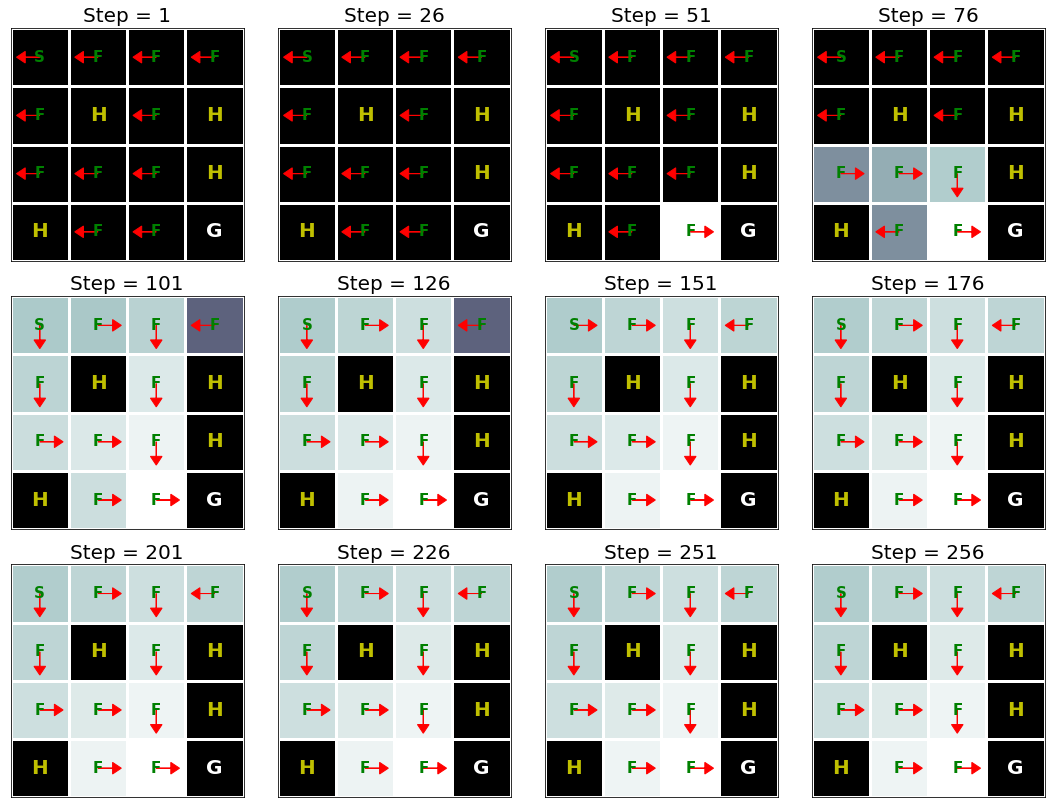

In [26]:
q_learning(env_info=env_info, gamma=gamma, num_iters=num_iters, alpha=alpha, epsilon=epsilon)

## Deep Q-Learning

- https://github.com/fg91/Deep-Q-Learning

### Dueling Networks

![dueling](./images/8/dueling.png)

- In the normal DQN architecture (top network in the figure) the *final hidden layer is fully-connected and consists of 512 rectifier units. The output layer is a fully-connected linear layer with a single output for each valid action.* (see page 6 of [Mnih et al. 2015](https://www.nature.com/articles/nature14236/)) 

- These outputs are the predicted $Q(s,a;\theta)$-values for action $a$ in state $s$.


### Dueling Networks

![dueling](./images/8/dueling.png)

- Instead of directly predicting a single $Q$-value for each action, the dueling architecture splits the final convolutional layer into two streams that represent the value and advantage functions that predict a *state value* $V(s)$ that depends only on the state, and *action advantages* $A(s,a)$ that depend on the state and the respective action. On page 2 of [Wang et al. 2016](https://arxiv.org/abs/1511.06581) the authors explain:

>Intuitively, the dueling architecture can learn which states are (or are not) valuable, without having to learn the effect of each action for each state. This is particularly useful in states where its actions do not affect the environment in any relevant way. 
In the experiments, we demonstrate that the dueling architecture can more quickly identify the correct action during policy evaluation as redundant or similar actions are added to the learning problem. 

- The *state value* $V(s)$ predicts *how good it is to be in a certain state* $s$ and the *action advantage* $A(s,a)$ predicts *how good it is to perform action $a$ in state $s$*.

- Next, we have to combine the value and advantage stream into $Q$-values $Q(s,a)$. This is done the following way (equation 9 in [Wang et al. 2016](https://arxiv.org/abs/1511.06581)):

$$
\begin{equation}
Q(s,a) = V(s) + \left(A(s,a) - \frac 1{| \mathcal A |}\sum_{a'}A(s, a')\right)
\end{equation}
$$

- Why so complicated instead of just adding $V(s)$ and $A(s,a)$? Let's assume $Q(s,a) = V(s) + \mathbf{A}(s,a), \quad \mathbf{A}=\left(A(s,a) - \frac 1{| \mathcal A |}\sum_{a'}A(s, a')\right)$:

- The Q function measures the value of choosing a particular action when in a particular state. The value function $V$, which is the expected value of $Q$ over all possible actions, $V = E(Q)$, measures how good it is to be in this particular state. 

- If you combine $E(Q) = V$ and $Q = V + \mathbf{A}$, you find $E(Q) = E(V) + E(\mathbf{A})$. But $V$ does not depend on any action, which means $E(V)=V$, $E(Q) = V + E(\mathbf{A}) = V$ and thus $E(\mathbf{A})=0$. The expected value of $\mathbf{A}$ is zero because we subtract the mean of the advantages from every advantage:

$$
\begin{equation}
E(\mathbf{A})=E\left(A(s,a) - \frac 1{| \mathcal A |}\sum_{a'}A(s, a')\right) = E\Bigl(A - E(A)\Bigr) = E(A)- E(E(A)) = E(A) - E(A) = 0
\end{equation}
$$

![](./images/8/DQN.png)

* The problem is that both $Q_\text{prediction}$ and $Q_\text{target}$ depend on the same parameters $\theta$ if only one network is used. This can lead to instability when regressing $Q_\text{prediction}$ towards $Q_\text{target}$ because the "target is moving". We ensure a "fixed target" by introducing a second network with fixed and only occasionally updated parameters that estimates the target $Q$-values.

- DQN has been observed to estimate unrealistically high $Q$-values. The reason for this is, that the Bellman equation *includes a maximization step over estimated action values, which tends to prefer overestimated to underestimated values* (see [van Hasselt et al. 2016, page 1](http://www.aaai.org/ocs/index.php/AAAI/AAAI16/paper/download/12389/11847)). 

- The estimated $Q$-values are noisy. Assume that the true $Q$-value is 0 for all actions. But because of the noisy estimation, some $Q$-values might be slightly positive, others slightly negative. The max operation in the Bellman equation will however always chose the small positive values, despite the fact, that those actions are not truly better. The estimatation of $Q$-values is thus biased towards larger values. How do we fix this?

- Instead of estimating the $Q$-values in the next state $Q(s',a')$ with only the target network, we use the main network to estimate which action is the best and then ask the target network how high the $Q$-value is for that action. This way, the main network will still prefer the action with the small positive $Q$-value but because of the noisy estimation, the target network will predict a small positive **or** small negative $Q$-value for that action and on average, the predicted $Q$-values will be closer to 0.

- Mathematically, the reason for the overestimation is, that the expectation of a maximum is greater than or equal to the maximum of an expectation [van Hasselt 2013, Theorem 1](https://arxiv.org/abs/1302.7175).

- The Bellman equation changes from

$$
\begin{align}
Q_\text{target}(s,a) &= r + \gamma \textrm{max} Q(s',a';\theta_\text{target}) &\text{Normal DQN}\\
\text{to}\qquad\qquad Q_\text{target}(s,a) &= r + \gamma Q\left(s',a'=\text{argmax} Q(s',a';\theta_\text{main});\theta_\text{target}\right)&\text{Double DQN}
\end{align}
$$

- Code: http://localhost:8888/notebooks/8-7-reinforcement-learning/DQN.ipynb

<table>
  <tr>
    <td><center><b>Breakout</b></center></td>
     <td><center><b>Pong</b></center></td>
  </tr>
  <tr>
    <td><img src="./8-7-reinforcement-learning/GIF/ATARI_frame_0_reward_421.0.gif" width=500 ></td>
    <td><img src="./8-7-reinforcement-learning/GIF/ATARI_frame_0_reward_21.0.gif" width=500 ></td>
  </tr>
 </table>
